<a href="https://colab.research.google.com/github/lenkaflorienkaa/pcvkganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

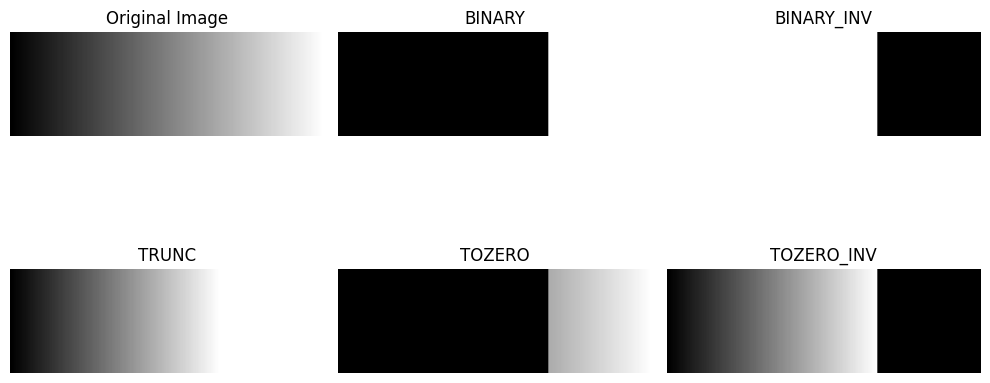

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic gradient image (left-to-right gradient)
gradient_img = np.linspace(0, 255, 300, dtype=np.uint8)  # 300 pixels wide gradient
gradient_img = np.tile(gradient_img, (100, 1))  # Repeat it vertically to make it 100x300

# Set the threshold value
threshold_value = 170

# Apply different global thresholding techniques
_, binary = cv.threshold(gradient_img, threshold_value, 255, cv.THRESH_BINARY)
_, binary_inv = cv.threshold(gradient_img, threshold_value, 255, cv.THRESH_BINARY_INV)
_, trunc = cv.threshold(gradient_img, threshold_value, 255, cv.THRESH_TRUNC)
_, tozero = cv.threshold(gradient_img, threshold_value, 255, cv.THRESH_TOZERO)
_, tozero_inv = cv.threshold(gradient_img, threshold_value, 255, cv.THRESH_TOZERO_INV)

# Define titles and images for displaying
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient_img, binary, binary_inv, trunc, tozero, tozero_inv]

# Plot each thresholded image in a 2x3 grid layout
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')  # Hide axes for cleaner output
plt.tight_layout()
plt.show()


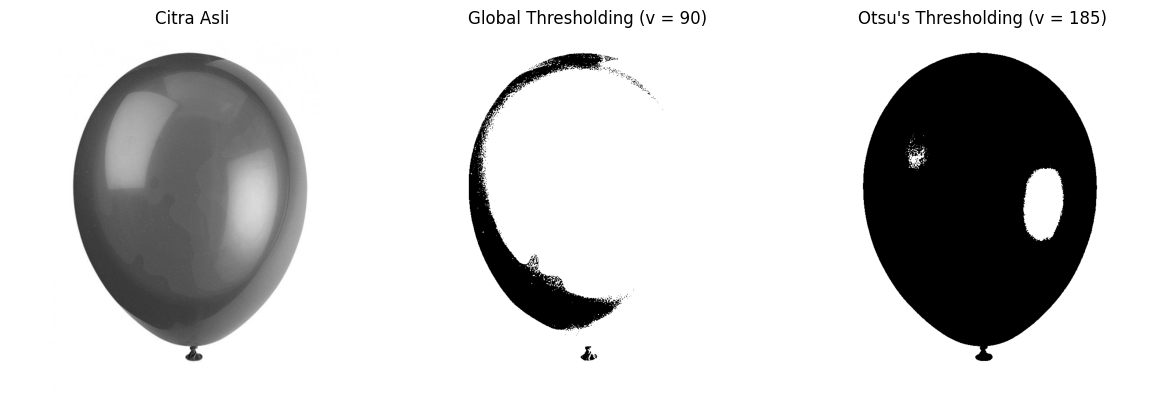

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the balloon image in grayscale
filename = '/content/drive/MyDrive/Images/balloon.jpg'
img = cv.imread(filename, 0)

# Global Thresholding
global_thresh_val = 90
_, global_thresh = cv.threshold(img, global_thresh_val, 255, cv.THRESH_BINARY)

# Manual Otsu's Thresholding
# Calculate histogram and probabilities of each intensity level
histogram, _ = np.histogram(img.ravel(), bins=256, range=(0, 256))
total_pixels = img.size
sum_total = np.dot(np.arange(256), histogram)
sumB = 0
wB = 0
maximum_variance = 0
otsu_threshold = 0

# Iterate through all possible thresholds and calculate between-class variance
for t in range(256):
    wB += histogram[t]
    if wB == 0:
        continue
    wF = total_pixels - wB
    if wF == 0:
        break
    sumB += t * histogram[t]
    mB = sumB / wB
    mF = (sum_total - sumB) / wF
    between_class_variance = wB * wF * (mB - mF) ** 2
    if between_class_variance > maximum_variance:
        maximum_variance = between_class_variance
        otsu_threshold = t

# Apply Otsu's threshold
_, otsu_thresh = cv.threshold(img, otsu_threshold, 255, cv.THRESH_BINARY)

# Display results
titles = ['Citra Asli', f'Global Thresholding (v = {global_thresh_val})', f"Otsu's Thresholding (v = {otsu_threshold})"]
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


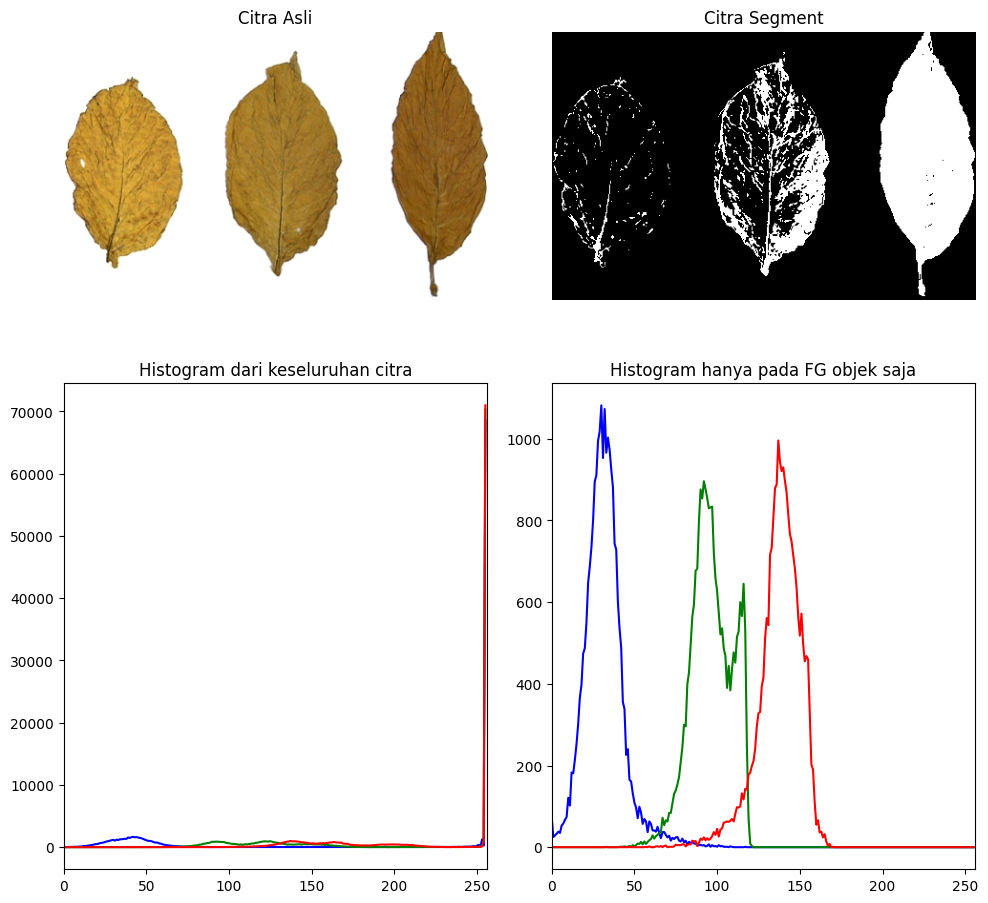

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
filename = '/content/drive/MyDrive/Images/tobacco.jpg'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB for display

# Convert the image to grayscale and segment the leaf using thresholding
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, segmented_img = cv.threshold(gray_img, 120, 255, cv.THRESH_BINARY_INV)

# Create a mask where the segmented image is white (foreground)
mask = segmented_img

# Calculate histogram for the entire image (for each color channel)
hist_full_blue = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_green = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_red = cv.calcHist([img], [2], None, [256], [0, 256])

# Calculate histogram for the masked (foreground only) image
hist_fg_blue = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_fg_green = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_fg_red = cv.calcHist([img], [2], mask, [256], [0, 256])

# Plot the images and histograms
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Display the segmented image
plt.subplot(2, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')

# Plot the histogram of the entire image
plt.subplot(2, 2, 3)
plt.plot(hist_full_blue, color='blue')
plt.plot(hist_full_green, color='green')
plt.plot(hist_full_red, color='red')
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Plot the histogram of only the foreground
plt.subplot(2, 2, 4)
plt.plot(hist_fg_blue, color='blue')
plt.plot(hist_fg_green, color='green')
plt.plot(hist_fg_red, color='red')
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

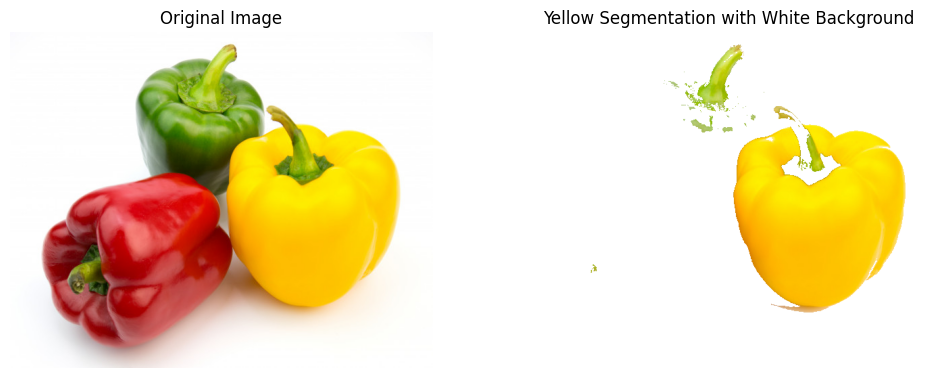

In [20]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Images/peppers.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image_rgb.reshape(-1, 3)

# Apply KMeans to find clusters (colors)
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixels)

# Map each pixel to its cluster center
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image_rgb.shape).astype(np.uint8)

# Find the cluster closest to yellow by comparing average RGB values of clusters
# Defining the "ideal" yellow color in RGB
yellow_rgb = np.array([255, 255, 0])

# Calculate the distance of each cluster to yellow
distances = np.linalg.norm(kmeans.cluster_centers_ - yellow_rgb, axis=1)
yellow_cluster = np.argmin(distances)

# Create a mask for yellow color
mask = (kmeans.labels_ == yellow_cluster).reshape(image_rgb.shape[:2])

# Set the background to white where it's not yellow
output_white_bg = np.ones_like(image_rgb) * 255  # White background
output_white_bg[mask] = image_rgb[mask]  # Keep yellow regions as they are

# Plot original and yellow-segmented image with white background
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(output_white_bg)
ax[1].set_title("Yellow Segmentation with White Background")
ax[1].axis('off')
plt.show()
